# Exercise 1

## Import data

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import statsmodels.api as sm

In [2]:
data = pd.read_csv('brainweight.txt', delim_whitespace=True)

C:\Users\mathi\AppData\Local\Temp\ipykernel_15024\428249795.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('brainweight.txt', delim_whitespace=True)


## Plot

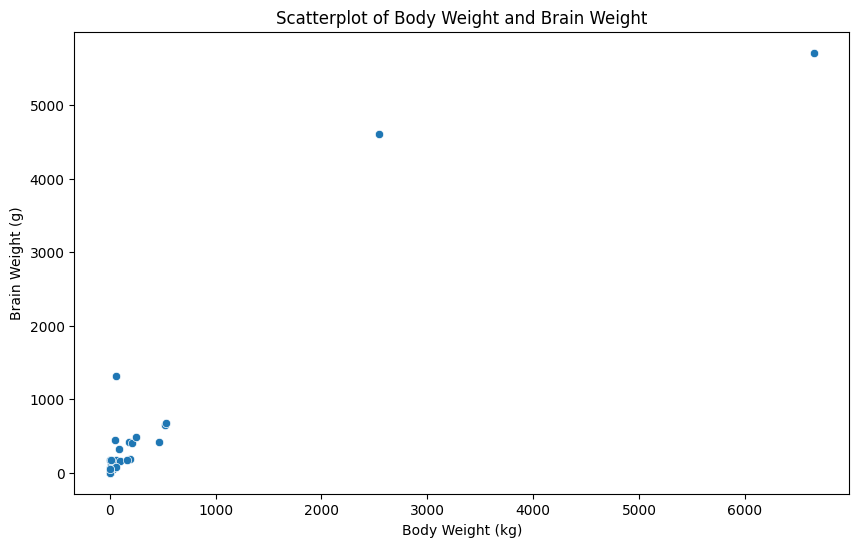

In [3]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='body', y='brain')
plt.title('Scatterplot of Body Weight and Brain Weight')
plt.xlabel('Body Weight (kg)')
plt.ylabel('Brain Weight (g)')
plt.show()

# Exercise 2

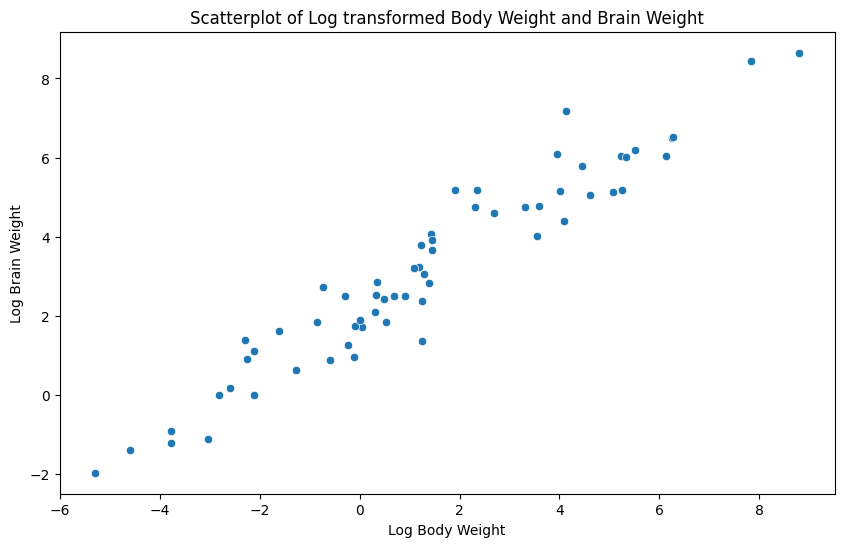

In [4]:
data['log_body'] = np.log(data['body'])
data['log_brain'] = np.log(data['brain'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='log_body', y='log_brain')
plt.title('Scatterplot of Log transformed Body Weight and Brain Weight')
plt.xlabel('Log Body Weight')
plt.ylabel('Log Brain Weight')
plt.show()

In [5]:
correlation = data['log_body'].corr(data['log_brain'])
correlation

0.9595747583709804

# Exercise 3

In [6]:
slope, intercept, r_value, p_value, std_err = linregress(data['log_body'], data['log_brain'])
# Print the regression results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")

Slope: 0.7516859362419006
Intercept: 2.134788676764636
R-squared: 0.9207837169027256
P-value: 9.835792242827628e-35
Standard error: 0.02846355983823929


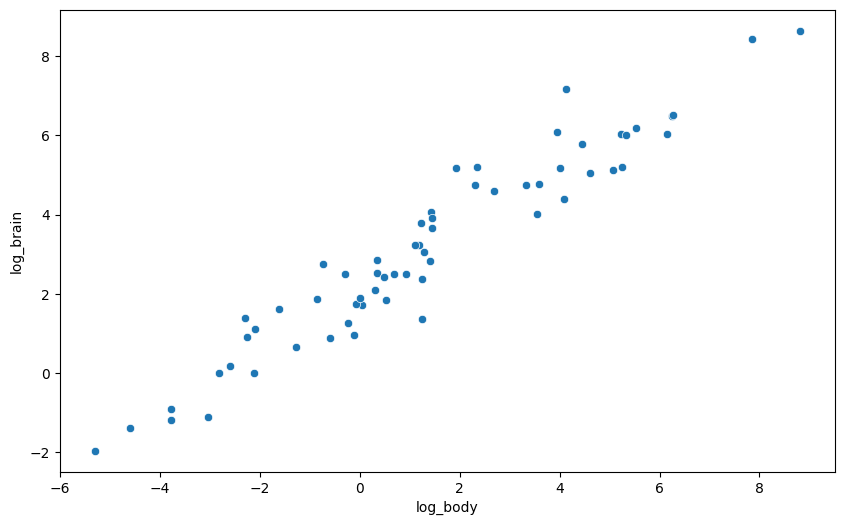

In [12]:
# Plot the data and the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log_body', y='log_brain', data=data)
model = sm.OLS(data['log_brain'], sm.add_constant(data['log_body'])).fit()

# Exercise 4

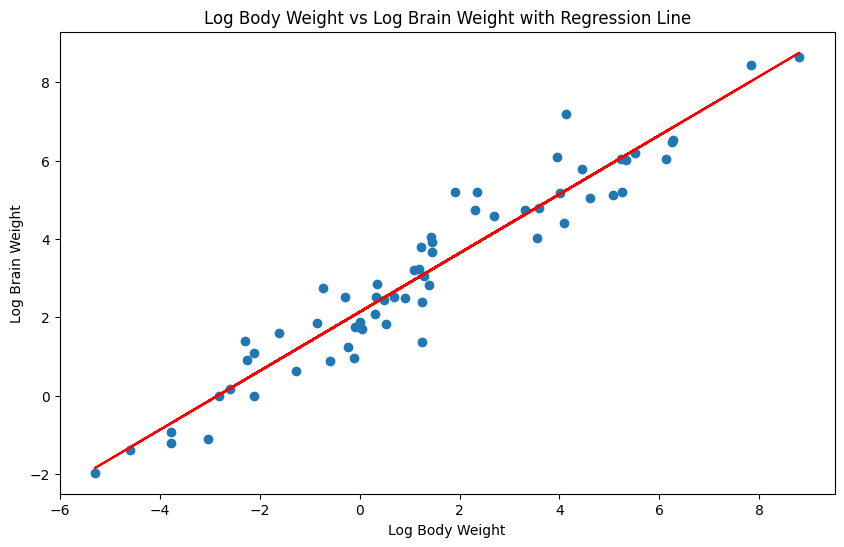

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(data['log_body'], data['log_brain'])
plt.plot(data['log_body'], model.predict(sm.add_constant(data['log_body'])), color='red')
plt.xlabel('Log Body Weight')
plt.ylabel('Log Brain Weight')
plt.title('Log Body Weight vs Log Brain Weight with Regression Line')
plt.show()

# Exercise 5

## Plot residuals vs fitted values and QQ plot

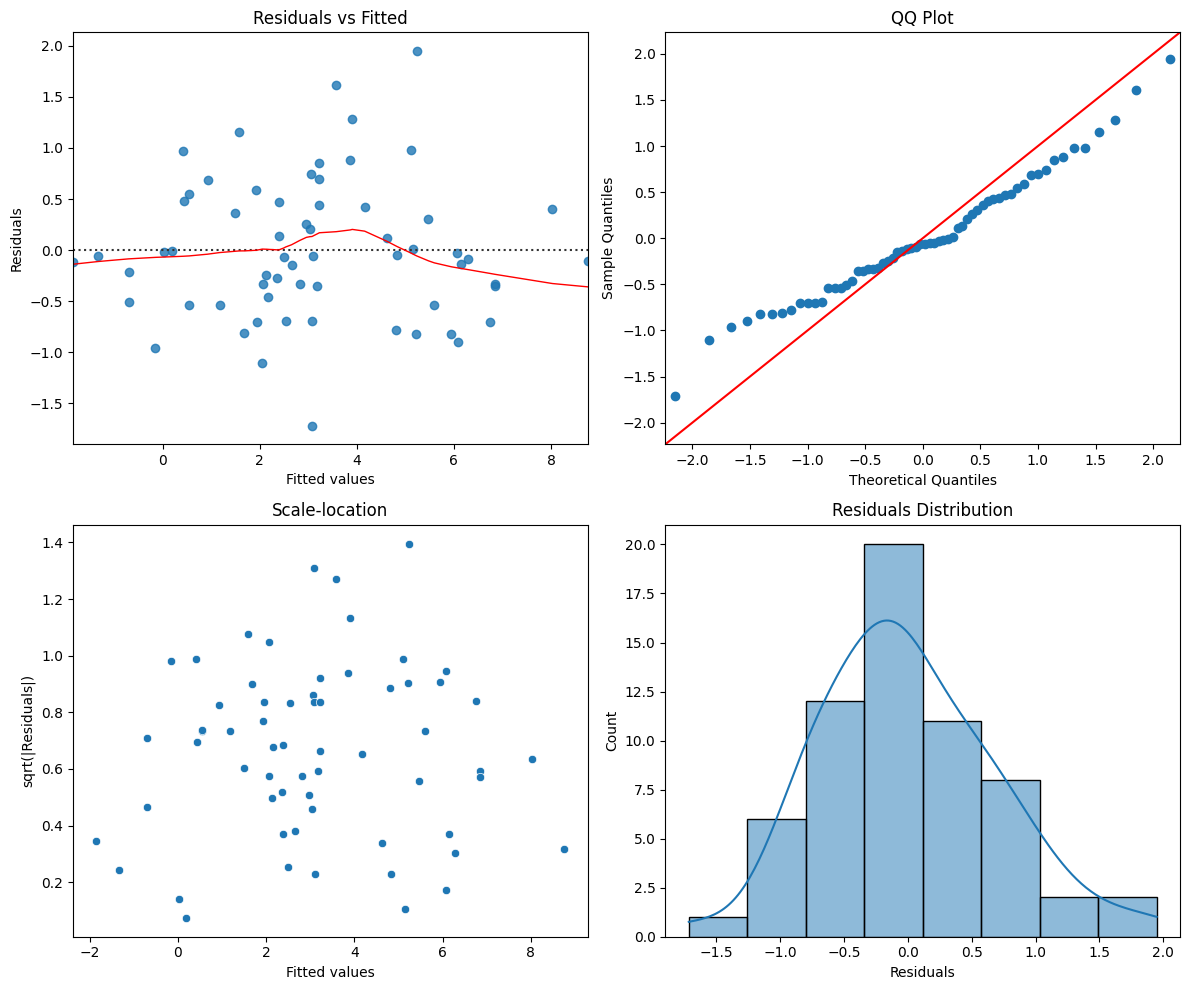

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, ax=ax[0, 0], line_kws={'color': 'red', 'lw': 1})
ax[0, 0].set_title('Residuals vs Fitted')
ax[0, 0].set_xlabel('Fitted values')
ax[0, 0].set_ylabel('Residuals')

# QQ Plot
sm.qqplot(model.resid, line='45', ax=ax[0, 1])
ax[0, 1].set_title('QQ Plot')

# Scale-Location
sns.scatterplot(x=model.fittedvalues, y=np.sqrt(np.abs(model.resid)), ax=ax[1, 0])
ax[1, 0].set_title('Scale-location')
ax[1, 0].set_xlabel('Fitted values')
ax[1, 0].set_ylabel('sqrt(|Residuals|)')

# Residuals distribution
sns.histplot(model.resid, kde=True, ax=ax[1, 1])
ax[1, 1].set_title('Residuals Distribution')
ax[1, 1].set_xlabel('Residuals')

plt.tight_layout()
plt.show()

In [9]:
r_value**2

0.9207837169027256